In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#FINIDING OUTLIERS

In [2]:
np.random.seed(42)
data=np.random.normal(50,15,100)
data=np.append(data,[150,200,-50])

In [3]:
df=pd.DataFrame(data,columns=["Value"])

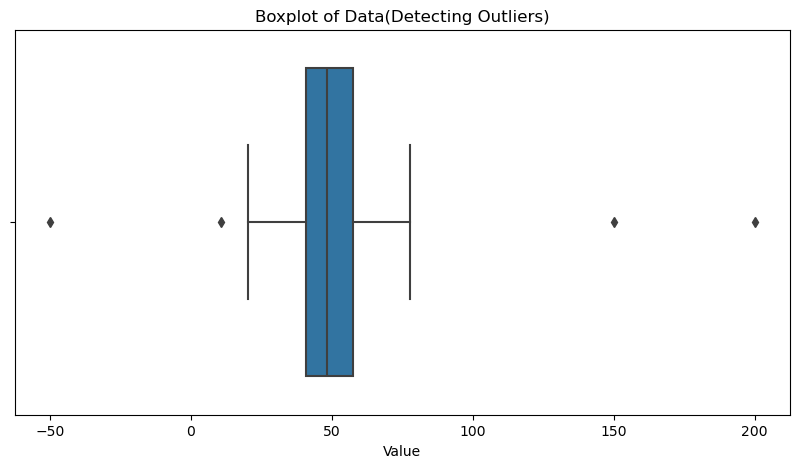

In [4]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Value'])
plt.title("Boxplot of Data(Detecting Outliers)")
plt.show()

In [5]:
q1=df['Value'].quantile(0.25)
q3=df['Value'].quantile(0.75)
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
outliers_iqr=df[(df['Value']<lower_bound) | (df['Value']> upper_bound)]
print("Outliers detected using IOR:\n",outliers_iqr)

Outliers detected using IOR:
           Value
74    10.703823
100  150.000000
101  200.000000
102  -50.000000


In [6]:
#HANDLING OUTLIERS
#1.REMOVING OUTLIERS

In [7]:
df_cleaned=df[(df['Value']>=lower_bound)&(df['Value']<=upper_bound)]
print("Data after removing outliers:\n",df_cleaned)

Data after removing outliers:
         Value
0   57.450712
1   47.926035
2   59.715328
3   72.845448
4   46.487699
..        ...
95  28.047276
96  54.441804
97  53.915829
98  50.076702
99  46.481193

[99 rows x 1 columns]


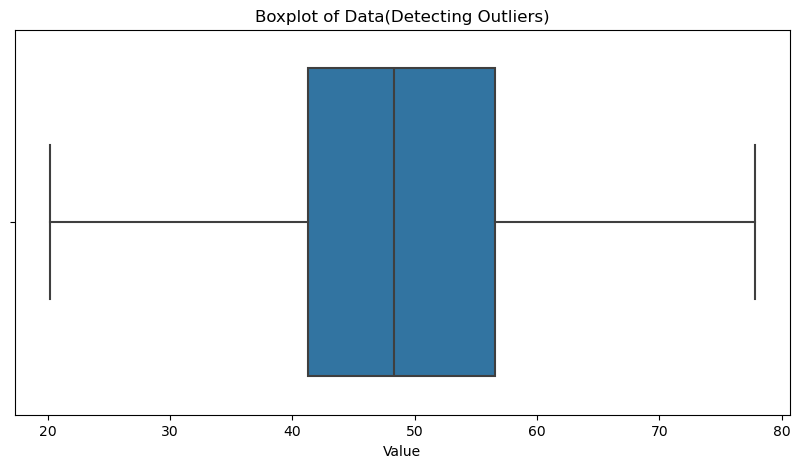

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_cleaned['Value'])
plt.title("Boxplot of Data(Detecting Outliers)")
plt.show()

In [9]:
#2.Replacing Outliers with Mean or Median - BEST OPT

In [11]:
median_value=df['Value'].median()
df['Value_replaced']=df['Value'].apply(lambda x: median_value if x<lower_bound or x>upper_bound else x)

In [12]:
#3. Using LOG Transformation